#                 Détection des intrusions réseaux par Machine Learning

# Importing needed dependencies

In [63]:
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score

import pandas as pd
import seaborn as sns 


# Data preprocessing


# Exploring the raw data


In [2]:
kddtrain=pd.read_csv('trainset.csv')
kddtest=pd.read_csv('KDDTest.csv')

In [3]:
kddtrain.head()

,ID,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,class,num,categorie
0,0,0,tcp,ftp_data,SF,491,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,normal
1,1,0,udp,other,SF,146,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
2,2,0,tcp,private,S0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,DOS
3,3,0,tcp,http,SF,232,8153,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
4,4,0,tcp,http,SF,199,420,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal


In [4]:
kddtest.head()

,ID,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,class,num,categorie
0,0,0,tcp,private,REJ,0,0,0,0,0,...,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21,DOS
1,1,2,tcp,ftp_data,SF,12983,0,0,0,0,...,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21,normal
2,2,0,icmp,eco_i,SF,20,0,0,0,0,...,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15,unknown
3,3,1,tcp,telnet,RSTO,0,15,0,0,0,...,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11,unknown
4,4,0,tcp,http,SF,267,14515,0,0,0,...,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21,normal


In [5]:
kddtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 45 columns):
ID                             125973 non-null int64
duration                       125973 non-null int64
protocol_type                  125973 non-null object
service                        125973 non-null object
flag                           125973 non-null object
src_bytes                      125973 non-null int64
dst_bytes                      125973 non-null int64
land                           125973 non-null int64
wrong_fragment                 125973 non-null int64
urgent                         125973 non-null int64
hot                            125973 non-null int64
num_failed_logins              125973 non-null int64
logged_in                      125973 non-null int64
num_compromised                125973 non-null int64
root_shell                     125973 non-null int64
su_attempted                   125973 non-null int64
num_root                       125973 

In [6]:
kddtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22542 entries, 0 to 22541
Data columns (total 45 columns):
ID                             22542 non-null int64
duration                       22542 non-null int64
protocol_type                  22542 non-null object
service                        22542 non-null object
flag                           22542 non-null object
src_bytes                      22542 non-null int64
dst_bytes                      22542 non-null int64
land                           22542 non-null int64
wrong_fragment                 22542 non-null int64
urgent                         22542 non-null int64
hot                            22542 non-null int64
num_failed_logins              22542 non-null int64
logged_in                      22542 non-null int64
num_compromised                22542 non-null int64
root_shell                     22542 non-null int64
su_attempted                   22542 non-null int64
num_root                       22542 non-null int64
num_

# show count categorie of attacks

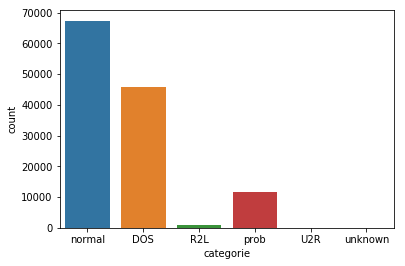

In [7]:
sns.countplot(x='categorie',data=kddtrain)

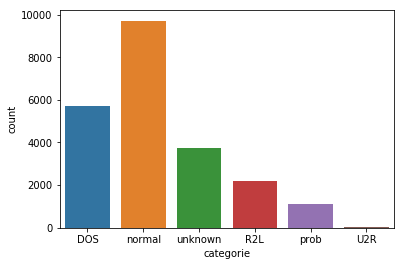

In [8]:
sns.countplot(x='categorie',data=kddtest)

# Data normalization

In [9]:
kddtrain.head()

,ID,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,class,num,categorie
0,0,0,tcp,ftp_data,SF,491,0,0,0,0,...,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,normal
1,1,0,udp,other,SF,146,0,0,0,0,...,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
2,2,0,tcp,private,S0,0,0,0,0,0,...,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,DOS
3,3,0,tcp,http,SF,232,8153,0,0,0,...,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
4,4,0,tcp,http,SF,199,420,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal


 # Checking for missing values

In [10]:
kddtrain.isna().sum()

ID                             0
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
srv_rerror_rate.1              0
same_srv_r

# Encoding dummy variables


In [11]:
dummies=['protocol_type','service','flag']
dataset_Train_dummied = pd.get_dummies(kddtrain, columns=dummies)
dataset_Train_dummied = dataset_Train_dummied.drop('ID', axis=1)


In [12]:
dummies=['protocol_type','service','flag']
dataset_Test_dummied = pd.get_dummies(kddtest, columns=dummies)
dataset_Test_dummied = dataset_Test_dummied.drop('ID', axis=1)

In [13]:
dataset_Train_dummied.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Columns: 125 entries, duration to flag_SH
dtypes: float64(15), int64(24), object(2), uint8(84)
memory usage: 49.5+ MB


In [54]:
dataset_Test_dummied.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       ...
       'flag_REJ', 'flag_RSTO', 'flag_RSTOS0', 'flag_RSTR', 'flag_S0',
       'flag_S1', 'flag_S2', 'flag_S3', 'flag_SF', 'flag_SH'],
      dtype='object', length=118)

In [55]:
dataset_Test_dummied.isna().sum()

duration              0
src_bytes             0
dst_bytes             0
land                  0
wrong_fragment        0
urgent                0
hot                   0
num_failed_logins     0
logged_in             0
num_compromised       0
root_shell            0
su_attempted          0
num_root              0
num_file_creations    0
num_shells            0
num_access_files      0
num_outbound_cmds     0
is_host_login         0
is_guest_login        0
count                 0
srv_count             0
serror_rate           0
srv_serror_rate       0
rerror_rate           0
srv_rerror_rate       0
srv_rerror_rate.1     0
same_srv_rate         0
diff_srv_rate         0
srv_diff_host_rate    0
dst_host_count        0
                     ..
service_printer       0
service_private       0
service_remote_job    0
service_rje           0
service_shell         0
service_smtp          0
service_sql_net       0
service_ssh           0
service_sunrpc        0
service_supdup        0
service_systat  

In [15]:
dataset_Train_dummied['categorie'].unique()


array(['normal', 'DOS', 'R2L', 'prob', 'U2R', 'unknown'], dtype=object)

In [16]:
dataset_Test_dummied['categorie'].unique()


array(['DOS', 'normal', 'unknown', 'R2L', 'prob', 'U2R'], dtype=object)

In [17]:
dataset_Train_dummied['categorie'] = dataset_Train_dummied['categorie'].map( {'DOS': 0, 'U2R': 1,'R2L':2,'prob':3,'normal':4,'unknown':5} ).astype(int)

In [18]:
dataset_Test_dummied['categorie'] = dataset_Test_dummied['categorie'].map( {'DOS': 0, 'U2R': 1,'R2L':2,'prob':3,'normal':4,'unknown':5} ).astype(int)

In [19]:
dataset_Train_dummied['categorie'].unique()

array([4, 0, 2, 3, 1, 5], dtype=int64)

In [20]:
dataset_Test_dummied['categorie'].unique()

array([0, 4, 5, 2, 3, 1], dtype=int64)

In [21]:
X=dataset_Train_dummied.loc[:, dataset_Train_dummied.columns != 'categorie']


In [22]:
X = X.drop('class', axis=1)


In [23]:
X=X.drop('num',axis=1)

In [58]:
y=dataset_Train_dummied['class']

In [25]:
Xtest=dataset_Test_dummied.loc[:, dataset_Test_dummied.columns != 'categorie']
Xtest = Xtest.drop('class', axis=1)
Xtest=Xtest.drop('num',axis=1)

In [56]:
ytest=dataset_Test_dummied['categorie']

# Model creation


# Spliting dataset_Train into train and test

In [60]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

# Trying Decision tree

In [64]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [29]:
y_pred = clf.predict(X_test)

In [30]:
accuracy = accuracy_score(y_test,y_pred)

In [31]:
accuracy

0.9978170271879341

#  Trying Naive Bayes

In [32]:
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)

In [33]:
y_pred = gnb.predict(X_test)

In [34]:
accuracy = accuracy_score(y_test,y_pred)

In [35]:
accuracy

0.4015876165905934

# Trying  MLPClassifier

In [36]:
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt


In [37]:
mlp = MLPClassifier(hidden_layer_sizes=(60,), max_iter=100, alpha=1e-4,
                    solver='sgd', verbose=10, random_state=10,
                    learning_rate_init=.0001)

In [38]:
mlp.fit(X_train, y_train)


Iteration 1, loss = 2.38067836
Iteration 2, loss = 4.00209882
Iteration 3, loss = 3.84145843
Iteration 4, loss = 3.59602140
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(60,), learning_rate='constant',
       learning_rate_init=0.0001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=10, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=10,
       warm_start=False)

In [39]:
y_pred = mlp.predict(X_test)

In [40]:
accuracy = accuracy_score(y_test,y_pred)

In [41]:
accuracy

0.911371303830125

In [42]:
from sklearn import svm
svm = svm.SVC()

In [43]:
#svm.fit(X_train, y_train)


In [44]:
#y_pred = svm.predict(X_test)

#accuracy = accuracy_score(y_test,y_pred)

# K-folds and cross validation


In [45]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits = 10, shuffle = True, random_state  =0)

In [46]:
tree = tree.DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(tree,X_train, y_train, cv= k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.99761858 0.99692399 0.99702322 0.99672554 0.9973209  0.99821393
 0.99761858 0.99821393 0.9972214  0.99712216]


# Trying  MLPClassifier

In [47]:
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=50, alpha=1e-4,
                    solver='sgd', verbose=10, random_state=10,
                    learning_rate_init=.0001)

scoring = 'accuracy'
score = cross_val_score(mlp,X_train, y_train, cv= k_fold, scoring=scoring)
print(score)

Iteration 1, loss = 2.17345991
Iteration 2, loss = 1.88201649
Iteration 3, loss = 1.74430647
Iteration 4, loss = 1.63861693
Iteration 5, loss = 1.54092624
Iteration 6, loss = 1.44482200
Iteration 7, loss = 1.28591165
Iteration 8, loss = 1.19800295
Iteration 9, loss = 1.14400912
Iteration 10, loss = 1.08742144
Iteration 11, loss = 1.03876530
Iteration 12, loss = 0.99208064
Iteration 13, loss = 0.95170175
Iteration 14, loss = 0.91562663
Iteration 15, loss = 0.88223415
Iteration 16, loss = 0.85223593
Iteration 17, loss = 0.82348417
Iteration 18, loss = 0.80042772
Iteration 19, loss = 0.77605019
Iteration 20, loss = 0.75388717
Iteration 21, loss = 0.73205274
Iteration 22, loss = 0.70597061
Iteration 23, loss = 0.77659572
Iteration 24, loss = 0.73672241
Iteration 25, loss = 0.70595116
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 443.54717729
Iteration 2, loss = 468.16434804
Iteration 3, loss = 468.04319677
Iteration 4, loss =

C:\Users\mmcd\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.99225014
Iteration 2, loss = 1.45233380
Iteration 3, loss = 1.45508378
Iteration 4, loss = 1.30610500
Iteration 5, loss = 1.23243679
Iteration 6, loss = 1.15990974
Iteration 7, loss = 1.07459889
Iteration 8, loss = 0.99382040
Iteration 9, loss = 0.95138075
Iteration 10, loss = 0.85641040
Iteration 11, loss = 0.78764176
Iteration 12, loss = 0.86004203
Iteration 13, loss = 0.81130173
Iteration 14, loss = 0.79255137
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 22.63375177
Iteration 2, loss = 23.01087887
Iteration 3, loss = 22.87629065
Iteration 4, loss = 22.89370424
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 29.69267421
Iteration 2, loss = 39.77222058
Iteration 3, loss = 39.55331644
Iteration 4, loss = 39.37484481
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 2.00196688
I

C:\Users\mmcd\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 3.24153923
Iteration 2, loss = 2.70492526
Iteration 3, loss = 2.60740835
Iteration 4, loss = 2.48150645
Iteration 5, loss = 2.33193200
Iteration 6, loss = 2.12493894
Iteration 7, loss = 2.25974597
Iteration 8, loss = 2.20342839
Iteration 9, loss = 2.16997888
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 2.11909268
Iteration 2, loss = 1.77996268
Iteration 3, loss = 1.60284154
Iteration 4, loss = 1.32779574
Iteration 5, loss = 1.31493732
Iteration 6, loss = 1.19636158
Iteration 7, loss = 1.32850846
Iteration 8, loss = 1.19329475
Iteration 9, loss = 1.11173118
Iteration 10, loss = 1.04044062
Iteration 11, loss = 0.97545552
Iteration 12, loss = 0.91833956
Iteration 13, loss = 0.86794235
Iteration 14, loss = 0.82040153
Iteration 15, loss = 0.77996002
Iteration 16, loss = 0.74285452
Iteration 17, loss = 0.71147554
Iteration 18, loss = 0.68206618
Iteration 19, loss = 0.65706628
Iteration 20, loss = 0.63339418

# Trying RandomForestClassifier

In [48]:
forest = RandomForestClassifier()
scoring = 'accuracy'
score = cross_val_score(forest,X_train, y_train, cv= k_fold, scoring=scoring)
print(score)

[0.99761858 0.99841238 0.99781703 0.99712244 0.99791625 0.99781703
 0.99791625 0.9977178  0.9975191  0.99741987]


In [49]:
gnb = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(gnb,X_train, y_train, cv= k_fold, scoring=scoring)
print(score)


[0.38886684 0.40642985 0.41516174 0.4089105  0.3974995  0.40017861
 0.4062314  0.39571344 0.39634812 0.40359234]


# Model saving and loading

In [50]:
import pickle
pickle.dump(clf, open("model_tree.pkl",'wb'))

In [51]:
model = pickle.load(open("model_tree.pkl",'rb'))